In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Building an Image Classifier
**import Tensorflow and Keras**

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.9.0'

In [4]:
tf.__version__

'2.9.2'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist


In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


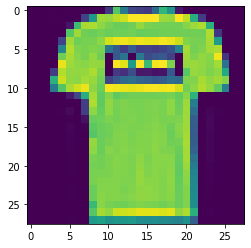

In [7]:
plt.imshow(X_train_full[1])

In [8]:
y_train_full[1]

0

In [9]:
class_names = ["T-shirt/top", "Trouser", "pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train_full[1]]

'T-shirt/top'

In [11]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

# Data Normalization
**normalize the data dimensions so that they are of approximately the same scale **

In [12]:
X_train_n = X_train_full / 255.
X_test_n = X_test/255.

# **Split the data into train/validation/test datasets**
validation data - used to tuning the hyperparameters and evaluate the models

In [13]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [14]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential() #Creating a object
model.add(keras.layers.Flatten(input_shape = [28,28]))#convert 2D array into single array
model.add(keras.layers.Dense(300, activation= "relu"))#300 neurons in Hidden Layer-1
model.add(keras.layers.Dense(100, activation= "relu"))#100 neurons in Hidden Layer-2
model.add(keras.layers.Dense(10, activation= "softmax"))#Since the classes are exclusive so I'm using softmax function


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


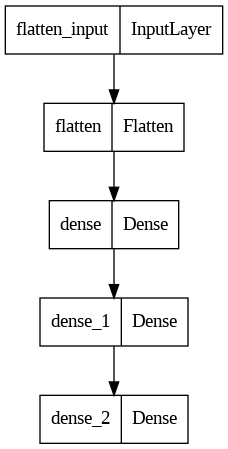

In [18]:
import pydot
keras.utils.plot_model(model)

In [19]:
weights, biases = model.layers[1].get_weights()

In [20]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

In [24]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4351 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4392 - accuracy: 0.8454 - val_loss: 0.5360 - val_accuracy: 0.7978
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4124 - accuracy: 0.8566 - val_loss: 0.3917 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3940 - accuracy: 0.8619 - val_loss: 0.3749 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8671 - val_loss: 0.3716 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3632 - accuracy: 0.8714 - val_loss: 0.3621 - val_accuracy:

In [25]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
model_history.history

{'loss': [0.7237027883529663,
  0.4842020273208618,
  0.43922898173332214,
  0.412444531917572,
  0.39395788311958313,
  0.37513676285743713,
  0.3632277250289917,
  0.3517501652240753,
  0.34148305654525757,
  0.33209365606307983,
  0.32405585050582886,
  0.3148830533027649,
  0.3080104887485504,
  0.30211520195007324,
  0.29458388686180115,
  0.28908002376556396,
  0.2837563455104828,
  0.2776043117046356,
  0.27278342843055725,
  0.2672877311706543,
  0.262274831533432,
  0.25757238268852234,
  0.25349682569503784,
  0.2482374608516693,
  0.24436022341251373,
  0.24045805633068085,
  0.2361312210559845,
  0.2326239049434662,
  0.22839932143688202,
  0.22510486841201782],
 'accuracy': [0.7643091082572937,
  0.831709086894989,
  0.8454363346099854,
  0.8565636277198792,
  0.8619090914726257,
  0.8671091198921204,
  0.871436357498169,
  0.8750908970832825,
  0.8789818286895752,
  0.8820182085037231,
  0.8840363621711731,
  0.8868181705474854,
  0.8893818259239197,
  0.8912727236747742,

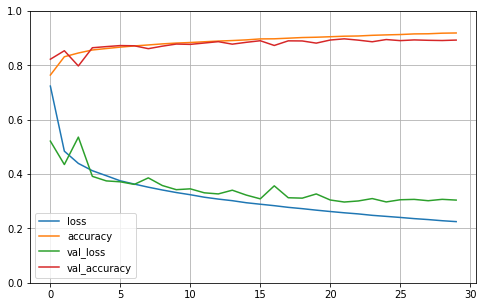

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()